In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, log_loss, r2_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import GradientBoostingClassifier
from GBDT.GradientBoostDecisionTree import GBDTClassifier

In [2]:
data = datasets.load_breast_cancer()
x = data.data
y = data.target
x.shape

(569, 30)

## My GBDT

In [3]:
Gbdt = GBDTClassifier(100, 0.1, 'deviance', tree_params={'criterion': 'mse', 'max_depth': 3}, subsample=0.5)
Gbdt.fit(x, y)

[0.52114951]


GBDTClassifier(learning_rate=0.1, loss='deviance', n_estimators=100,
               random_state=None, subsample=0.5,
               tree_params={'criterion': 'mse', 'max_depth': 3})

In [7]:
r2_score(y, Gbdt.predict(x))

0.9624094920987263

In [8]:
Gbdt.predict_log_proba(x)

array([[-1.62738831],
       [-2.05432716],
       [-2.14109626],
       [-1.76049642],
       [-1.66387548],
       [-1.70045722],
       [-2.14109626],
       [-2.01529823],
       [-2.06658043],
       [-1.64129941],
       [-1.44566514],
       [-2.14408719],
       [-1.97455967],
       [-0.78626185],
       [-1.79751409],
       [-2.16607732],
       [-2.06262554],
       [-2.14109626],
       [-2.14109626],
       [ 2.24072013],
       [ 2.33516121],
       [ 2.33516121],
       [-1.78796727],
       [-2.14109626],
       [-2.14109626],
       [-2.15762953],
       [-2.12895042],
       [-2.14519357],
       [-2.14109626],
       [-1.44511498],
       [-2.14109626],
       [-1.9630871 ],
       [-2.14109626],
       [-2.14109626],
       [-2.14145602],
       [-2.14688312],
       [-1.20130345],
       [ 2.33516121],
       [-0.7872172 ],
       [-1.66064206],
       [ 0.65573644],
       [-0.1430598 ],
       [-2.14338523],
       [-1.93444538],
       [-0.82080662],
       [-2

In [9]:
Gbdt.predict_proba(x)

array([[0.16418845],
       [0.11361588],
       [0.10516618],
       [0.14672818],
       [0.15924245],
       [0.15440556],
       [0.10516618],
       [0.11760604],
       [0.11238771],
       [0.16228833],
       [0.1906696 ],
       [0.10488505],
       [0.12189998],
       [0.31297189],
       [0.14215394],
       [0.10283839],
       [0.11278284],
       [0.10516618],
       [0.10516618],
       [0.90384706],
       [0.91174751],
       [0.91174751],
       [0.14332212],
       [0.10516618],
       [0.10516618],
       [0.10362042],
       [0.10631467],
       [0.10478122],
       [0.10516618],
       [0.19075451],
       [0.10516618],
       [0.12313334],
       [0.10516618],
       [0.10516618],
       [0.10513233],
       [0.10462284],
       [0.23124342],
       [0.91174751],
       [0.3127665 ],
       [0.15967583],
       [0.65830199],
       [0.46429592],
       [0.10495097],
       [0.12625936],
       [0.30559246],
       [0.10493192],
       [0.91174751],
       [0.124

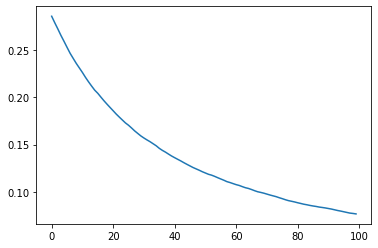

In [10]:
plt.plot(range(len(Gbdt.train_score_)), Gbdt.train_score_)

In [11]:
Gbdt.feature_importances_

array([0.00504364, 0.03052271, 0.00358714, 0.0059953 , 0.00468649,
       0.0025432 , 0.00730984, 0.14200788, 0.00381053, 0.001954  ,
       0.0109797 , 0.00632595, 0.00400925, 0.03288168, 0.00559842,
       0.00026438, 0.00220188, 0.00293621, 0.00281196, 0.00782927,
       0.10624601, 0.02525461, 0.23558894, 0.10225045, 0.02068488,
       0.00239352, 0.02596228, 0.19234908, 0.00238784, 0.00358298])

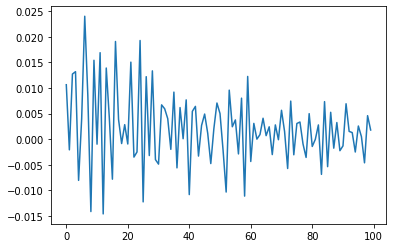

In [12]:
plt.plot(range(len(Gbdt.oob_improvement_)), Gbdt.oob_improvement_)

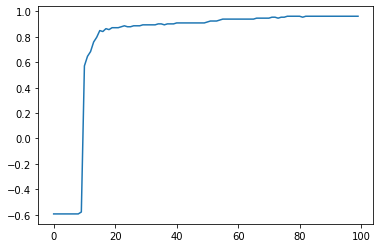

In [13]:
scores = [r2_score(y, pred) for pred in Gbdt.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)

In [14]:
log_proba = [p for p in Gbdt.staged_predict_log_proba(x)]
log_proba[0].shape

(569, 1)

In [15]:
Gbdt.get_params()

{'learning_rate': 0.1,
 'loss': 'deviance',
 'n_estimators': 100,
 'random_state': None,
 'subsample': 0.5,
 'tree_params': {'criterion': 'mse', 'max_depth': 3}}

In [16]:
from sklearn.utils.estimator_checks import check_estimator
check_estimator(GBDTClassifier)

[-0.2006707  -0.61903921 -1.38629436]
[-0.2006707  -0.61903921 -1.38629436]
[-0.2006707  -0.61903921 -1.38629436]
[-0.2006707  -0.61903921 -1.38629436]
[-0.69314718 -0.69314718 -0.69314718]
[-0.69314718 -0.69314718 -0.69314718]
[-0.69314718 -0.69314718 -0.69314718]
[-1.55059741 -0.73088751 -1.09861229 -1.09861229]
[0.]
[0.]
[0.]
[0.]
[-0.69314718 -0.69314718 -0.69314718]
[0.]
[0.]
[0.]
[-inf]
[0.]


D:\Projects\Python\GBDT-project\GBDT\Loss.py:49: RuntimeWarning: divide by zero encountered in log
  return np.log(Y / (1 - Y))
D:\Projects\Python\GBDT-project\GBDT\Loss.py:58: RuntimeWarning: invalid value encountered in multiply
  return np.mean(y * np.log(1 + np.exp(-f)))
D:\Projects\Python\GBDT-project\GBDT\Loss.py:58: RuntimeWarning: invalid value encountered in multiply
  return np.mean(y * np.log(1 + np.exp(-f)))
D:\Projects\Python\GBDT-project\GBDT\Loss.py:58: RuntimeWarning: invalid value encountered in multiply
  return np.mean(y * np.log(1 + np.exp(-f)))
D:\Projects\Python\GBDT-project\GBDT\Loss.py:58: RuntimeWarning: invalid value encountered in multiply
  return np.mean(y * np.log(1 + np.exp(-f)))
D:\Projects\Python\GBDT-project\GBDT\Loss.py:58: RuntimeWarning: invalid value encountered in multiply
  return np.mean(y * np.log(1 + np.exp(-f)))
D:\Projects\Python\GBDT-project\GBDT\Loss.py:58: RuntimeWarning: invalid value encountered in multiply
  return np.mean(y * np.log(1

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

 ## Sklearn GBDT

In [17]:
gbr = GradientBoostingClassifier(criterion='mse', loss='deviance', n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.5)
gbr.fit(x, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
r2_score(y, gbr.predict(x))

1.0

In [19]:
gbr.predict_log_proba(x)

array([[-7.47376017e-03, -4.90009159e+00],
       [-6.75880426e-03, -5.00028679e+00],
       [-1.49448786e-03, -6.50671885e+00],
       ...,
       [-2.77040118e-03, -5.89014802e+00],
       [-6.43552884e-04, -7.34882811e+00],
       [-6.46835476e+00, -1.55298194e-03]])

In [20]:
gbr.predict_proba(x)

array([[9.92554099e-01, 7.44590107e-03],
       [9.93263985e-01, 6.73601491e-03],
       [9.98506628e-01, 1.49337167e-03],
       ...,
       [9.97233433e-01, 2.76656716e-03],
       [9.99356654e-01, 6.43345848e-04],
       [1.55177668e-03, 9.98448223e-01]])

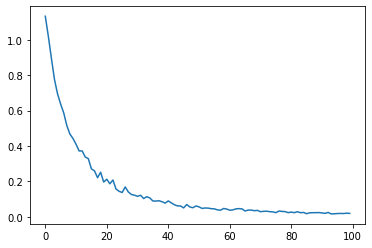

In [21]:
plt.plot(range(len(gbr.train_score_)), gbr.train_score_)

In [22]:
gbr.feature_importances_

array([0.00061613, 0.02375349, 0.0034596 , 0.00416139, 0.0007161 ,
       0.00342048, 0.00199219, 0.19616796, 0.00133693, 0.0013492 ,
       0.01455235, 0.00761888, 0.00787654, 0.01931838, 0.00330175,
       0.00226666, 0.01289572, 0.00059281, 0.00399021, 0.00377405,
       0.16673837, 0.03966336, 0.05140763, 0.08493453, 0.01070427,
       0.00221528, 0.0242215 , 0.29901024, 0.00387818, 0.00406579])

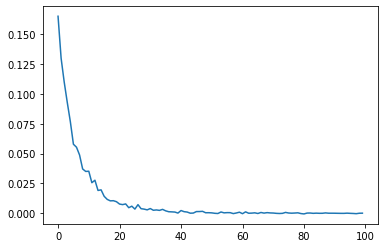

In [23]:
plt.plot(range(len(gbr.oob_improvement_)), gbr.oob_improvement_)

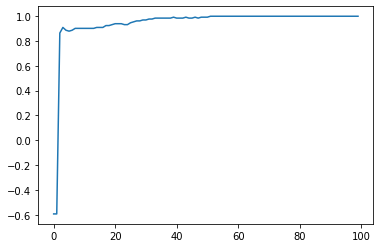

In [24]:
scores = [r2_score(y, pred) for pred in gbr.staged_predict(x)]
plt.plot(np.arange(len(scores)), scores)

In [25]:
proba = [p for p in gbr.staged_predict_proba(x)]
proba[0].shape

(569, 2)